In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\User\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
scoredata=pd.read_csv(link)
scoredata.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
scoredata.shape

(25, 2)

In [4]:
scoredata.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
scoredata.isna().sum()

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'No. of study hours v/s percentage')

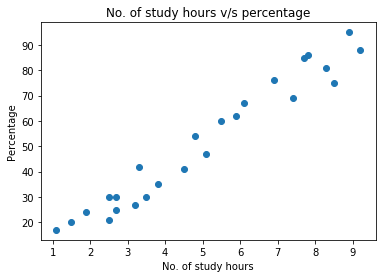

In [6]:
plt.scatter(scoredata['Hours'],scoredata['Scores'])
plt.xlabel("No. of study hours")
plt.ylabel("Percentage")
plt.title("No. of study hours v/s percentage")

In [7]:
x=scoredata.iloc[:,0].values
y=scoredata.iloc[:,1].values
x=x.reshape(-1,1)


### Creating the model

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [9]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
l =regressor.coef_*x+regressor.intercept_

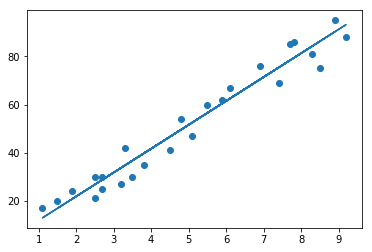

In [11]:
plt.scatter(x,y)
plt.plot(x,l)

In [12]:
ypredicted=regressor.predict(x_test)

In [13]:
df=pd.DataFrame({"Actual values":y_test,"Predicted values":ypredicted})
df

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
regressor.score(x,y)

0.9526947647057274

 ## Predicting the values

In [15]:
hours = 9.25
own_pred = regressor.predict(pd.DataFrame({hours}))
print("No of Hours =",hours)
print("Predicted Score = ",own_pred)
print("The score of student is",own_pred[0].round(2),'if they study for',hours,'hours')

No of Hours = 9.25
Predicted Score =  [93.69173249]
The score of student is 93.69 if they study for 9.25 hours


In [16]:
from sklearn import metrics
print("Mean absolute error",metrics.mean_absolute_error(y_test,ypredicted))


Mean absolute error 4.183859899002975


In [18]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [28]:
ridger=Ridge()
ridger.fit(x_train,y_train)
yridge=ridger.predict(x_test)
df=pd.DataFrame({"Actual values":y_test,"Predicted values":yridge})
print(df,"\n")
print("Regressor Score",ridger.score(x,y))

   Actual values  Predicted values
0             20         17.181700
1             27         33.894564
2             69         75.185168
3             30         27.012796
4             62         60.438524 

Regressor Score 0.9528326461865971


In [27]:
lassor=Lasso()
lassor.fit(x_train,y_train)
ylasso=lassor.predict(x_test)
df=pd.DataFrame({"Actual values":y_test,"Predicted values":ylasso})
print(df,"\n")
print("Regressor Score",lassor.score(x,y))

   Actual values  Predicted values
0             20         17.489479
1             27         34.062443
2             69         75.007413
3             30         27.238282
4             62         60.384210 

Regressor Score 0.9528413195954031
